# DAILY FEMALE BIRTHS IN CALIFORNIA IN THE YEAR 1959

### Environment setup

In [318]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.holtwinters import ExponentialSmoothing

import warnings
warnings.filterwarnings('ignore')

### Load the dataset

Source : https://www.kaggle.com/datasets/dougcresswell/daily-total-female-births-in-california-1959

In [319]:
df = pd.read_csv('daily-total-female-births-CA.csv', parse_dates=[0], index_col=[0])
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 1959-01-01 to 1959-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   births  365 non-null    int64
dtypes: int64(1)
memory usage: 5.7 KB


There are total 365 samples in the data - one for each day in the year 1959. 
<br> We have set date column as the index. 
<br> There are no missing values.

### Exploratory Data Analysis

In [320]:
#observe the values
df.head()

,births
date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [321]:
#changing variables into suitable data types
df.births = df.births.astype(int)
df.births.dtype

dtype('int64')

In [322]:
#statistical descriptions
df.describe()

,births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


In the year 1959, the mean births were 41 per day, with min 23 and max of 73.  
<br>The dataset does not seem to have any outliers or incorrect values.

Text(0.5, 0, 'Births')

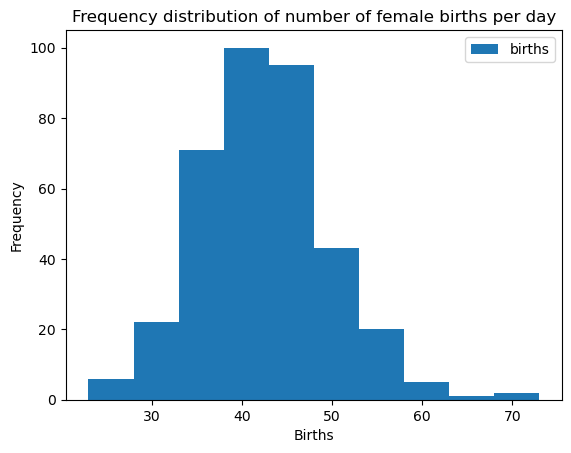

In [323]:
#histogram of births
df.plot(kind = 'hist')
plt.title("Frequency distribution of number of female births per day")
plt.xlabel("Births")

Most of the births per day are in the range of 40-50 per day. The values taper on the both the sides. But there are more values on the left.

In [324]:
#skewness 
df.skew()

births    0.447389
dtype: float64

It suggests that the distribution of the 'births' variable is moderately skewed to the right. This means that there may be a more number of values on the lower end of the distribution, with a smaller number of very high values pulling the mean to the right.

Text(0, 0.5, 'births')

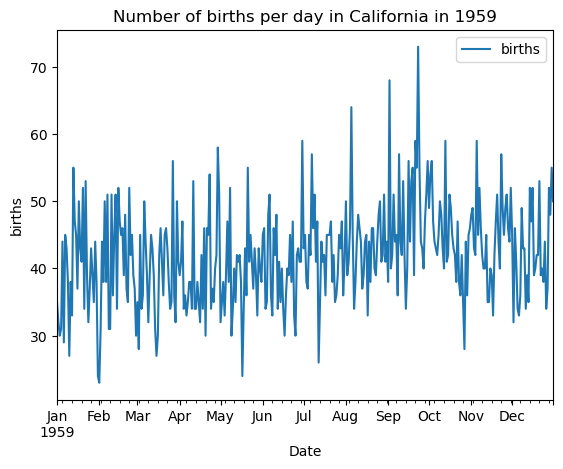

In [325]:
#visualize trends of female births over time in 1959
df.plot()
plt.title("Number of births per day in California in 1959")
plt.xlabel("Date")
plt.ylabel("births")

The data looks volatile. We have non-linear oscillating trend, wherein number of female births rises or drop every consecutive days. 
<br>This suggests a non-stationary time series wherein the statistical properties, such as the mean or variance, are not constant over time.
<br> Let's take mean over consecutive days (10 days and 20days) to observe any patterns.

Text(0, 0.5, 'mean births')

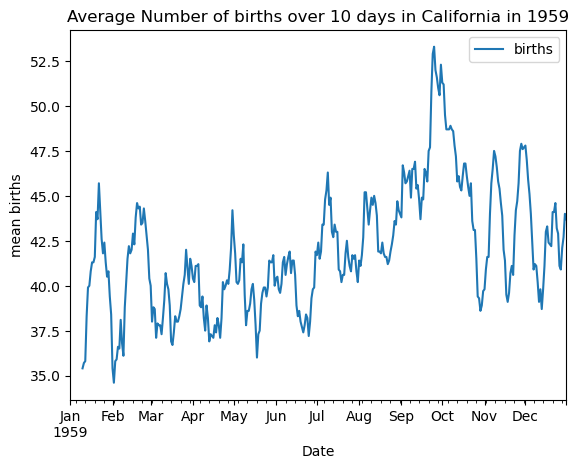

In [326]:
#rolling mean over period of 10 days
df_roll_mean10 = df.rolling(window=10).mean()
df_roll_mean10.plot()
plt.title("Average Number of births over 10 days in California in 1959")
plt.xlabel("Date")
plt.ylabel("mean births")

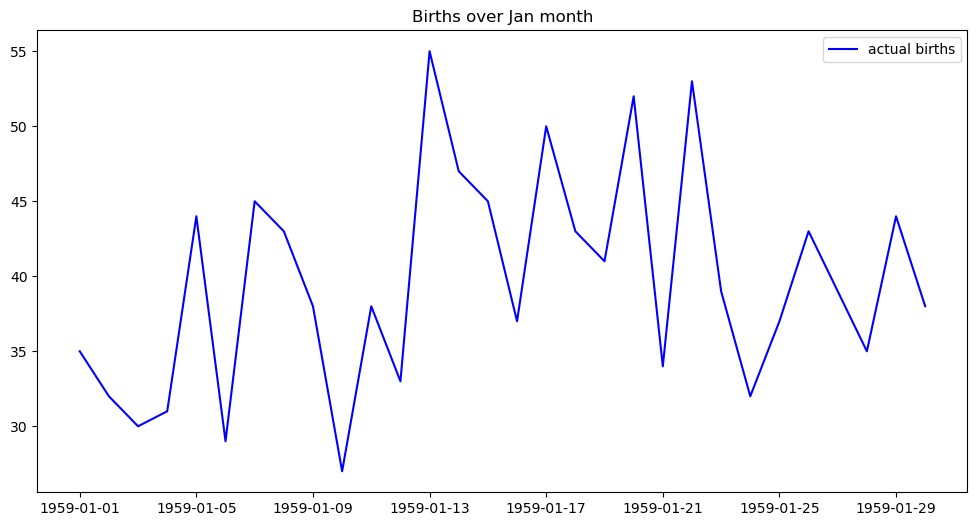

In [327]:
plt.figure(figsize=(12,6))
plt.plot(df[:30],c = 'b')
plt.title("Births over Jan month")
plt.legend( ["actual births","mean births"])

Since data contains information for an year, we cannot comment about seasonality over years.
But there seems to be no seasonality or repetitive patterns over weeks, days or months.

Text(0, 0.5, 'mean births')

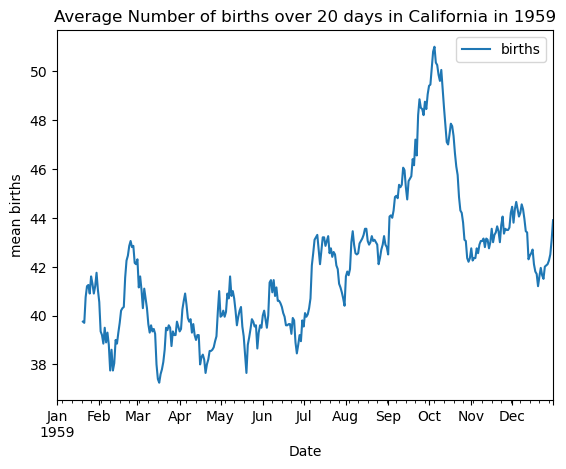

In [328]:
#rolling mean over period of 20 days
df_roll_mean20 = df.rolling(window=20).mean()
df_roll_mean20.plot()
plt.title("Average Number of births over 20 days in California in 1959")
plt.xlabel("Date")
plt.ylabel("mean births")

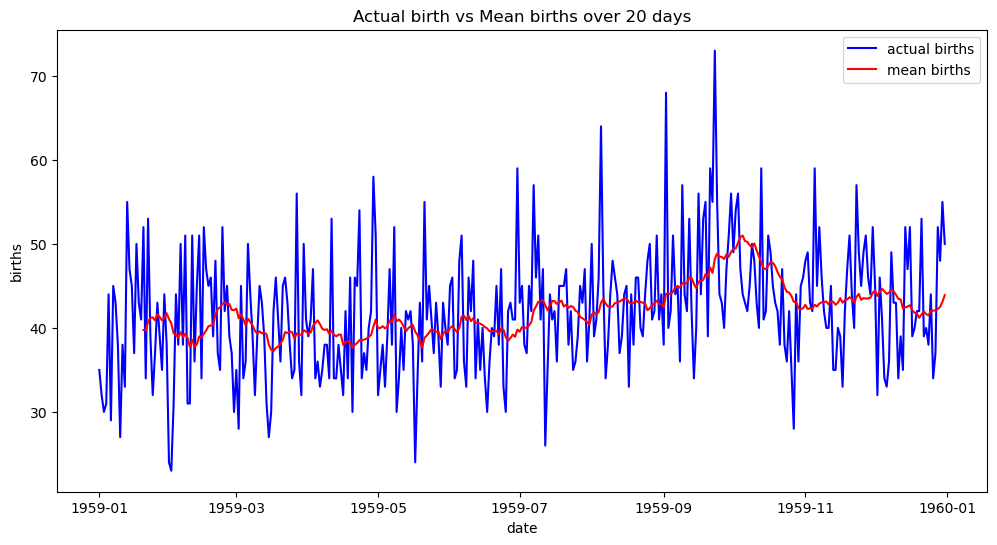

In [332]:
plt.figure(figsize=(12,6))
plt.plot(df,c = 'b')
plt.plot(df_roll_mean20,c = 'r')
plt.title("Actual birth vs Mean births over 20 days")
plt.ylabel("births")
plt.xlabel("date")
plt.legend( ["actual births","mean births"])

We can observe a peak (rise in the births) in the month of Sept - Oct.

**Statistical Tests**
- Augmented Dickey-Fuller (ADF) test  
- Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test.

In [333]:
#adf test
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
adf_test(df.births)

ADF Statistic: -4.808291
p-value: 0.000052
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


This output is from the Augmented Dickey-Fuller (ADF) test which is used to test for the presence of unit roots in a time series. The null hypothesis is that the time series has a unit root (i.e. non-stationary), while the alternative hypothesis is that the time series is stationary.

The ADF statistic is a negative value (-4.808291) and the p-value is very small (0.000052). This suggests strong evidence against the null hypothesis, which means we can reject the null hypothesis and conclude that the time series is stationary.

The critical values are also provided at the 1%, 5%, and 10% significance levels. Since the ADF statistic (-4.808291) is more negative than the critical values at all three significance levels, we can reject the null hypothesis of a unit root and conclude that the series is stationary.

In [336]:
#kpss test
def kpss_test(series):
    kpss_stat, p_value, lags, critical_values = kpss(series)
    print(f"KPSS Statistic: {kpss_stat:.3f}")
    print(f"p-value: {p_value:.3f}")
    print("Critical values:")
    for key, value in critical_values.items():
        print(f"   {key}: {value:.3f}")

kpss_test(df['births'])

KPSS Statistic: 1.613
p-value: 0.010
Critical values:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739


The KPSS test tests the null hypothesis that the time series data is stationary around a deterministic trend. The KPSS statistic is compared to the critical values at various significance levels. If the KPSS statistic is greater than the critical value, we reject the null hypothesis and conclude that the time series data is non-stationary.

In your case, the KPSS statistic is 1.613, which is greater than the critical value at the 5% significance level (0.463). Therefore, we reject the null hypothesis and conclude that the time series data is non-stationary.

**Statistical Test Result**
- ADF test suggest stationarity of the data
- KPSS suggest non-stationary behaviour 
- The high volatility in the data is an indicator of non-stationarity

Let's conclude that the data is non-stationary.

### Baseline Model

Let's create a baseline model where predicted value for a day = value of female birth at previous day.

In [337]:
df_baseline = pd.concat([df, df.births.shift(1)], axis=1)
df_baseline.columns = ['actual_births', 'baseline_shift1_births']
df_baseline.head()

,actual_births,baseline_shift1_births
date,,
1959-01-01,35,NaN
1959-01-02,32,35.0
1959-01-03,30,32.0
1959-01-04,31,30.0
1959-01-05,44,31.0


In [338]:
#removing first Missing value
df_test = df_baseline[1:]
df_test.head()

,actual_births,baseline_shift1_births
date,,
1959-01-02,32,35.0
1959-01-03,30,32.0
1959-01-04,31,30.0
1959-01-05,44,31.0
1959-01-06,29,44.0


In [339]:
#calculating mse over actual and predicted values
baseline_mse = mean_squared_error(df_test.actual_births, df_test.baseline_shift1_births)
round(baseline_mse,4)

84.2225

In [340]:
#rmse
baseline_rmse = np.sqrt(baseline_mse)
print("RMSE of the baseline model is ",round(baseline_rmse,4))

RMSE of the baseline model is  9.1773


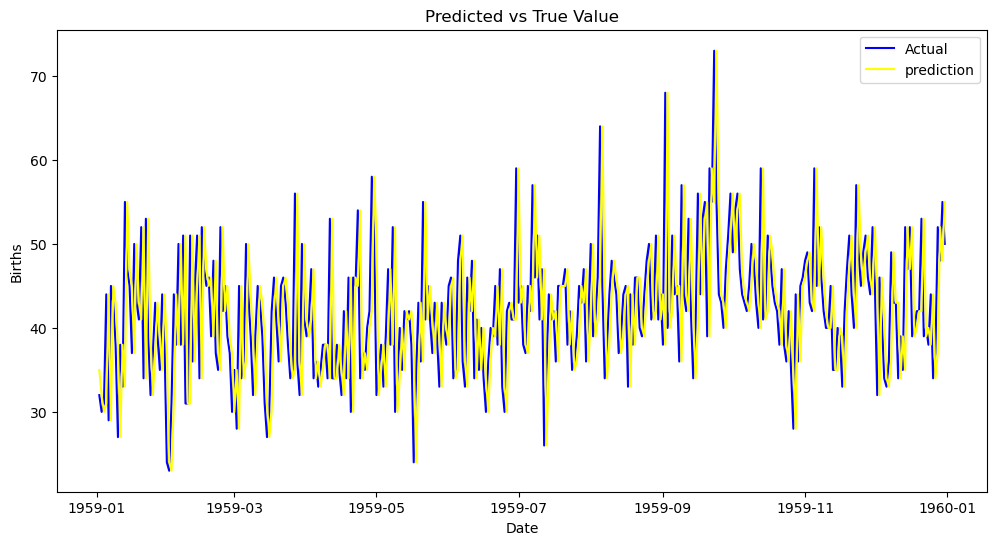

In [341]:
plt.figure(figsize=(12,6))
plt.plot(df_test.actual_births, color = "blue")
plt.plot(df_test.baseline_shift1_births, color = "yellow")
plt.legend(["Actual","prediction"]) 
plt.title("Predicted vs True Value")
plt.xlabel("Date")
plt.ylabel("Births")
plt.show()

### ARIMA : Auto Regressive (p) Integrated (d) Moving Average (q)

ARIMA (AutoRegressive Integrated Moving Average) models are a class of time series models used for forecasting future values of a time series based on its past values. An ARIMA model consists of three components: the autoregressive (AR) component, the integrated (I) component, and the moving average (MA) component.

The AR component models the relationship between an observation and a certain number of lagged observations, where the lag order is denoted as 'p'. The MA component models the error term as a linear combination of the error terms from previous periods, where the lag order is denoted as 'q'. The I component is used to make the time series stationary by taking the differences of the series until it is stationary. The order of differencing is denoted as 'd'.

#### Identifying p and q
The ACF and PACF plots helps us determine the correlation between the current observation and the lagged observations.
If both plots show significant spikes at lag k, then an ARMA(p,q) model may be appropriate.

[]

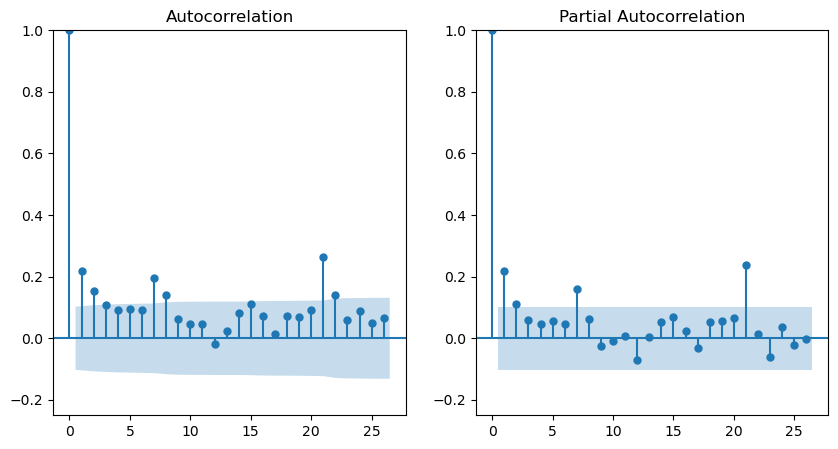

In [342]:
fig,ax = plt.subplots(1,2, figsize=(10, 5))
plot_acf(df,ax= ax[0]) 
ax[0].set_ylim(-0.25, 1)
#ax[0].set_title('Autocorrelation')

plot_pacf(df,ax = ax[1]) 
ax[1].set_ylim(-0.25, 1)
plt.plot()

Autocorrelation (ACF) : From the plot, we can see that there is a significant positive correlation at the first lag. This suggests that the series may not be stationary, as the mean and variance may change over time.
There are also some smaller positive correlations at lags 2, 3, 7, 21 but they are not significant. There is no significant correlation at higher lags, which suggests that the series does not have a seasonal pattern.

Partial Autocorrelation (PACF) : From the plot, we can see that the first few has a some positive correlation, followed by a negative correlation, positive correlation and negative correlation intervals. There seem to be some positive correlations at lags 1, 7 and 21 but it is not very strong to suggest a pattern.

If there is a significant spike at lag k in the PACF plot, then we set the value of the parameter p in the ARIMA model to k. Similarly, if there is a significant spike at lag k in the ACF plot, then we set the value of the parameter q in the ARIMA model to k. <br>
From our observations appropriate p and q values would be 1, 7 and 21.

#### Identifying d 
The number of times the time series needs to be differenced to achieve stationarity. 

From Statistical Tests performed above, we concluded that the data is stationary. Thus, we need to perform differentiation until stationarity is visible.

In [263]:
# Perform ADF test with differencing for first time
adf_test(df.diff().dropna())

ADF Statistic: -12.625179
p-value: 0.000000
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


The ADF test results show a significant decrease in the ADF statistic and a very low p-value of 0, which indicates that we can reject the null hypothesis of a unit root in the series. This suggests that the time series is stationary after differencing once, and a value of d=1 can be used in the ARIMA model.

In [243]:
# Peform KPSS test to confirm the same
kpss_test(df.diff().dropna())

KPSS Statistic: 0.187
p-value: 0.100
Critical values:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739


The KPSS test resulted in a non-significant p-value (0.100) and the test statistic (0.187) is lower than the critical values at all significance levels. Therefore, we can conclude that the time series is stationary after differencing once. Thus, d=1 is appropriate. 

#### Train - Test Partitioning
We cannot randomly sample the data points, as it would break the temporal relationship between them. Instead, we need to split the data in a way that preserves the temporal structure.

In [265]:
df_train = df[0:335] 
df_test = df[335:]

print("Train : ", df_train.shape, "\nTest : ", df_test.shape)

Train :  (335, 1) 
Test :  (30, 1)


#### Experimenting with ARIMA model

**Building & evaluating the mode for p=2, q=3 and d=1**

In [266]:
#building model
model_arima = ARIMA(df_train, order=(2,1,3))

#aic
model_arima = model_arima.fit()
round(model_arima.aic,4)

2260.1901

AIC stands for Akaike Information Criterion and is a measure of the relative quality of a statistical model. The lower the AIC, the better the model is considered to fit the data.

In [298]:
#bic
round(model_arima.bic,4)

2283.0569

Like AIC, BIC is used to compare the goodness-of-fit of different models, but it places a stronger penalty on the number of parameters used in the model. A lower BIC value indicates a better model fit.

In [267]:
#predictions
df_predict = model_arima.forecast(steps=30)
df_arima_pred = pd.concat((df_test, df_predict),axis=1)
df_arima_pred.columns = ['births', 'predicted']
df_arima_pred

,births,predicted_mean
1959-12-02,32,45.453447
1959-12-03,46,45.230959
1959-12-04,41,45.191523
1959-12-05,34,45.065867
1959-12-06,33,45.082223
1959-12-07,36,44.998680
1959-12-08,49,45.036057
1959-12-09,43,44.971887
1959-12-10,43,45.016042
1959-12-11,34,44.961723


In [268]:
#root mean squared error
arima_mse = mean_squared_error(df_arima_pred.births, df_arima_pred.predicted_mean)
arima_rmse = np.sqrt(arima_mse)
print("RMSE of the arima model is ",round(arima_rmse,4))

RMSE of the arima model is  7.1906


Let's create a function that models ARIMA for different p,q,d values so that we can perform hyper parameter tuning.

In [301]:
order_list, aic_list, bic_list, rmse_list = [],[],[],[]

def model_ARIMA(p,d,q, plot = False):
    model_arima = ARIMA(df_train, order=(p,d,q))
    model_arima = model_arima.fit()
    aic = round(model_arima.aic,4)
    bic = round(model_arima.bic,4)
    
    df_temp_predict = model_arima.forecast(steps=30)
    df_temp_pred = pd.concat((df_test, df_temp_predict),axis=1)
    
    arima_mse = mean_squared_error(df_temp_pred.births, df_temp_pred.predicted_mean)
    arima_rmse = np.sqrt(arima_mse)
    print("Order", "(" ,p,d,q, ")", "| AIC", aic , "| BIC", bic , " | RMSE : ",round(arima_rmse,4))
    order_list.append( (p,d,q))
    aic_list.append(aic)
    bic_list.append(bic)
    rmse_list.append(arima_rmse)
    
    if plot :
        plt.figure(figsize=(12,6))
        plt.plot(df_test.births, color = "blue")
        plt.plot(df_temp_predict, color = "red")
        plt.legend(["Actual","prediction"]) 
        plt.title("Predicted vs True Value")
        plt.xlabel("Date")
        plt.ylabel("Births")
        plt.show()

In [302]:
#import itertools
#pdq = list(itertools.product(p_range, [1], q_range))
#pdq

#trying multiple values combination
p_range, q_range = [1,7,21],[1,7,21]
d_range = [0,1,2]
for p in p_range:
    for q in q_range:
        for d in d_range:
            model_ARIMA(p,d,q)

Order ( 1 0 1 ) | AIC 2267.5468 | BIC 2282.8033  | RMSE :  7.0463
Order ( 1 1 1 ) | AIC 2258.672 | BIC 2270.1054  | RMSE :  7.1592
Order ( 1 2 1 ) | AIC 2358.3885 | BIC 2369.8129  | RMSE :  8.6105
Order ( 1 0 7 ) | AIC 2274.3252 | BIC 2312.4665  | RMSE :  6.9233
Order ( 1 1 7 ) | AIC 2268.8094 | BIC 2303.1097  | RMSE :  7.1392
Order ( 1 2 7 ) | AIC 2270.7811 | BIC 2305.0543  | RMSE :  7.5351
Order ( 1 0 21 ) | AIC 2283.7726 | BIC 2375.3117  | RMSE :  6.5567
Order ( 1 1 21 ) | AIC 2277.1411 | BIC 2364.7973  | RMSE :  6.7562
Order ( 1 2 21 ) | AIC 2283.4379 | BIC 2371.0252  | RMSE :  7.1965
Order ( 7 0 1 ) | AIC 2273.9377 | BIC 2312.079  | RMSE :  7.0706
Order ( 7 1 1 ) | AIC 2265.1071 | BIC 2299.4073  | RMSE :  7.2454
Order ( 7 2 1 ) | AIC 2282.6481 | BIC 2316.9214  | RMSE :  8.7195
Order ( 7 0 7 ) | AIC 2272.3409 | BIC 2333.367  | RMSE :  7.003
Order ( 7 1 7 ) | AIC 2267.7464 | BIC 2324.9136  | RMSE :  7.0878
Order ( 7 2 7 ) | AIC 2276.5447 | BIC 2333.6668  | RMSE :  7.5604
Order ( 7 0

In [303]:
#generating dataframe of the predictions metrics
df_result = pd.DataFrame(
    {'order': order_list,
     'aic': aic_list,
     'bic': bic_list,
     'rmse': rmse_list
    })
df_result.sort_values(by='rmse')

,order,aic,bic,rmse
18,"(21, 0, 1)",2277.4658,2369.0050,6.505719
6,"(1, 0, 21)",2283.7726,2375.3117,6.556744
15,"(7, 0, 21)",2287.0138,2401.4377,6.565490
19,"(21, 1, 1)",2271.2673,2358.9236,6.676413
7,"(1, 1, 21)",2277.1411,2364.7973,6.756167
24,"(21, 0, 21)",2301.0137,2468.8355,6.786760
21,"(21, 0, 7)",2281.4276,2395.8515,6.819369
25,"(21, 1, 21)",2285.5698,2449.4489,6.864261
20,"(21, 2, 1)",2278.7144,2366.3016,6.876804
3,"(1, 0, 7)",2274.3252,2312.4665,6.923287


The results indicate that the ARIMA(21,0,1) model has the lowest RMSE and lower AIC and BIC values among the models we have tested. Thus, the ARIMA(21,0,1) model provides the best balance between goodness of fit and simplicity, and thus may be the most appropriate model for forecasting future values of the time series.

**ARIMA OPTIMAL MODEL with p=21, d=0 and q=1**

Order ( 21 0 1 ) | AIC 2277.4658 | BIC 2369.005  | RMSE :  6.5057


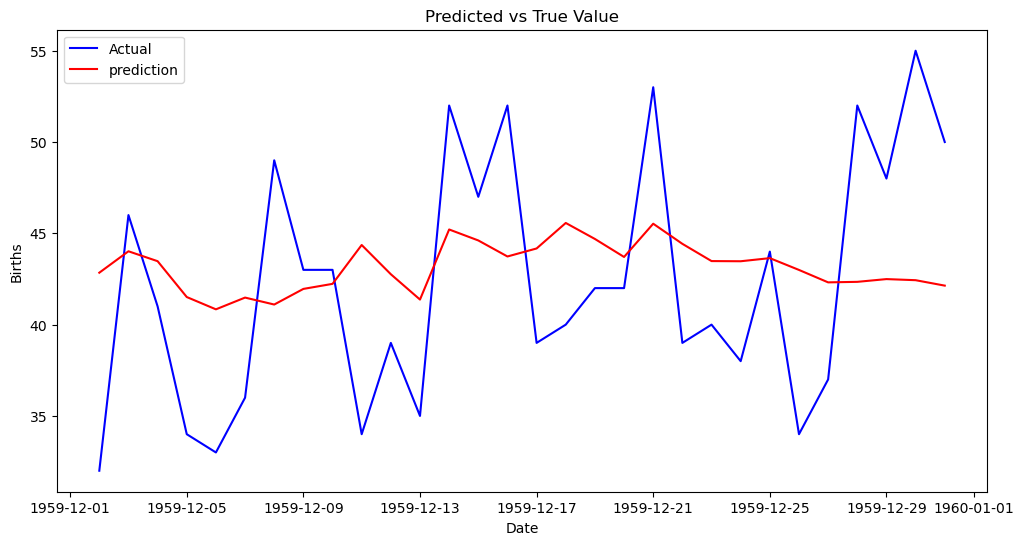

In [304]:
#final model
model_ARIMA(21,0,1, True)